In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import cv2
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [6]:
folder = 'data/yes/'
count = 1

for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "Yes_" +str(count)+".jpg"
    os.rename(source, destination)
    count+=1
print("All files are renamed in the yes dir.")

All files are renamed in the yes dir.


In [7]:
folder = 'data/no/'
count = 1

for filename in os.listdir(folder):
    source = folder + filename
    destination = folder + "No_" +str(count)+".jpg"
    os.rename(source, destination)
    count+=1
print("All files are renamed in the no dir.")

All files are renamed in the no dir.


In [10]:
listyes = os.listdir("data/yes/")
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir("data/no/")
number_files_no = len(listno)
print(number_files_no)

155
98


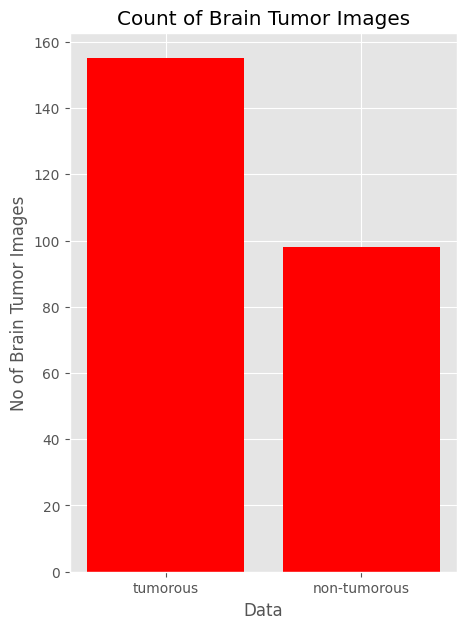

In [11]:
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="red")

plt.xlabel("Data")
plt.ylabel("No of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")
plt.show()

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [19]:
def timing(sec_elapsed):
    h = int(sec_elapsed / (60*60))
    m = int(sec_elapsed % (60*60) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m}:{s}"

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2

def augmented_data(file_dir, n_generated_samples, save_to_dir):
    """
    Generates augmented versions of images from the input directory and saves them to the specified directory.

    Parameters:
    file_dir (str): Path to the directory containing original images.
    n_generated_samples (int): Number of augmented images to generate per original image.
    save_to_dir (str): Path to the directory where the augmented images will be saved.
    """

    # ImageDataGenerator is used to randomly augment images with the specified transformations:
    # rotation, width and height shift, shear, brightness adjustment, horizontal/vertical flip, etc.
    data_gen = ImageDataGenerator(rotation_range=10,            # Randomly rotate the image by up to 10 degrees.
                                  width_shift_range=0.1,        # Shift the image horizontally by up to 10% of its width.
                                  height_shift_range=0.1,       # Shift the image vertically by up to 10% of its height.
                                  shear_range=0.1,              # Apply a shear transformation of up to 0.1.
                                  brightness_range=(0.3, 1.0),  # Randomly change brightness (30% to 100% of original).
                                  horizontal_flip=True,         # Randomly flip the image horizontally.
                                  vertical_flip=True,           # Randomly flip the image vertically.
                                  fill_mode='nearest')          # Fill in missing pixels after transformations.
    
    # Loop through all files in the given directory (file_dir)
    for filename in os.listdir(file_dir):
        # Read the image file using OpenCV
        image = cv2.imread(file_dir + '/' + filename)

        # Reshape the image to add an extra dimension (required by ImageDataGenerator).
        # The new shape will be (1, height, width, channels)
        image = image.reshape((1,) + image.shape)
        # Create a prefix for the augmented image filenames (e.g., 'aug_image1.jpg').
        save_prefix = 'aug_' + filename[:-4]
        # Initialize a counter to keep track of how many augmented samples have been generated for each image.
        i = 0
        # Generate augmented images using the flow() method from ImageDataGenerator.
        # It will create batches of augmented images, save them, and stop after generating the specified number.
        for batch in data_gen.flow(x=image,                  # The input image to be augmented.
                                   batch_size=1,             # Number of images per batch (1 in this case).
                                   save_to_dir=save_to_dir,  # Directory where augmented images will be saved.
                                   save_prefix=save_prefix,  # Prefix for the filenames of augmented images.
                                   save_format="jpg"):       # Format for saving the augmented images.  
            i += 1  # Increment the counter after each generated image.
            # Stop the augmentation process after generating the desired number of samples for this image.
            if i > n_generated_samples:
                break

In [20]:
import time
start_time = time.time()

yes_path = 'data/yes' 
no_path = 'data/no'

augmented_data_path = 'augmented_data/'

augmented_data(file_dir = yes_path, n_generated_samples=6, save_to_dir=augmented_data_path+'yes')
augmented_data(file_dir = no_path, n_generated_samples=9, save_to_dir=augmented_data_path+'no')

end_time = time.time()
execution_time = end_time - start_time
print(timing(execution_time))

0:1:41.70299458503723


In [21]:
def data_summary(main_path):
    yes_path = "augmented_data/yes/" 
    no_path = "augmented_data/no/"
    
    n_pos = len(os.listdir(yes_path))
    n_neg = len(os.listdir(no_path))
    
    n = (n_pos + n_neg)
    
    pos_per = (n_pos*100)/n
    neg_per = (n_neg*100)/n
    
    print(f"Number of sample: {n}")
    print(f"{n_pos} Number of positive sample in percentage: {pos_per}%")
    print(f"{n_neg} Number of negative sample in percentage: {neg_per}%")

In [22]:
data_summary(augmented_data_path)

Number of sample: 4129
2170 Number of positive sample in percentage: 52.5550980867038%
1959 Number of negative sample in percentage: 47.4449019132962%


In [24]:
listyes = os.listdir("augmented_data/yes/")
number_files_yes = len(listyes)
print(number_files_yes)

listno = os.listdir("augmented_data/no/")
number_files_no = len(listno)
print(number_files_no)

2170
1959


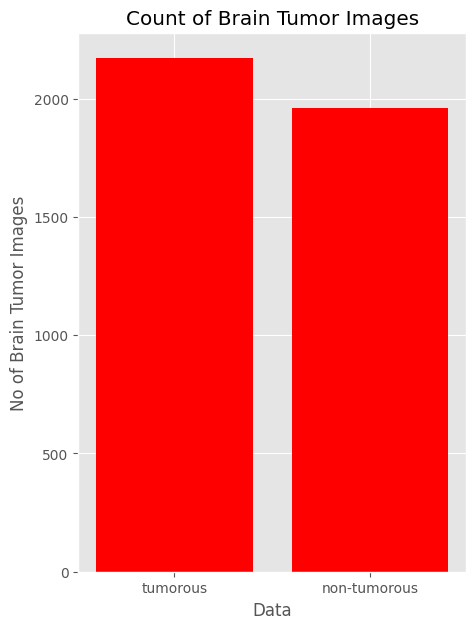

In [25]:
data = {'tumorous': number_files_yes, 'non-tumorous': number_files_no}

typex = data.keys()
values = data.values()

fig = plt.figure(figsize=(5,7))

plt.bar(typex, values, color="red")

plt.xlabel("Data")
plt.ylabel("No of Brain Tumor Images")
plt.title("Count of Brain Tumor Images")
plt.show()

In [31]:
import os
import imagehash
from PIL import Image

def remove_duplicates(image_folder):
    """
    Finds and removes duplicate images in the given folder based on image content (using perceptual hashing).
    
    Parameters:
    image_folder (str): Path to the folder containing images.
    
    Returns:
    list: A list of removed duplicate filenames.
    """
    
    # Dictionary to store hash of images with their filenames
    hashes = {}
    removed_files = []

    # Loop through all files in the folder
    for filename in os.listdir(image_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check if the file is an image
            file_path = os.path.join(image_folder, filename)
            
            try:
                # Open the image using PIL
                with Image.open(file_path) as img:
                    # Compute the perceptual hash using imagehash (phash method)
                    img_hash = imagehash.phash(img)
                
                # If the hash is already in the dictionary, it's a duplicate and can be removed
                if img_hash in hashes:
                    os.remove(file_path)  # Remove the duplicate image file
                    removed_files.append(filename)  # Add the removed file's name to the list
                else:
                    hashes[img_hash] = filename  # Store the hash with the corresponding filename
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    
    return removed_files


In [35]:
image_folder = r"augmented_data\yes"
remove_duplicates(image_folder)

['aug_Yes_118_0_8773.jpg',
 'aug_Yes_151_0_9851.jpg',
 'aug_Yes_3_0_6860.jpg',
 'aug_Yes_5_0_6993.jpg']

In [37]:
pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25857 sha256=0fee2f235e3e02cff03d103c189a050d03901e2cf266bfc7a21e7927e62278b2
  Stored in directory: c:\users\tariq\appdata\local\pip\cache\wheels\5b\76\96\ad0c321506837bef578cf3008df3916c23018435a355d9f6b1
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [38]:
import imutils
def crop_brain_tumor(image, plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5,5), 0)
    
    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres =cv2.erode(thres, None, iterations = 2)
    thres = cv2.dilate(thres, None, iterations = 2)
    
    cnts = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key = cv2.contourArea)
    
    extLeft = tuple(c[c[:,:,0].argmin()][0])
    extRight = tuple(c[c[:,:,0].argmax()][0])
    extTop = tuple(c[c[:,:,1].argmin()][0])
    extBot = tuple(c[c[:,:,1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]] 
    
    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        plt.show()
    return new_image

In [39]:
folder1 = 'augmented_data/no/'
folder2 = 'augmented_data/yes/'

for filename in os.listdir(folder1):
    img = cv2.imread(folder1 + filename)
    img = crop_brain_tumor(img, False)
    cv2.imwrite(folder1 + filename, img)
for filename in os.listdir(folder2):
    img = cv2.imread(folder2 + filename)
    img = crop_brain_tumor(img, False)
    cv2.imwrite(folder2 + filename, img)

In [42]:
from sklearn.utils import shuffle
def load_data(dir_list, image_size):
    X=[]
    y=[]
    
    image_width, image_height=image_size
    
    for directory in dir_list:
        for filename in os.listdir(directory):
            image = cv2.imread(directory + '/' + filename)
            image = crop_brain_tumor(image, plot=False)
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation = cv2.INTER_CUBIC)
            image = image/255.00
            X.append(image)
            if directory[-3:] == "yes":
                y.append(1)
            else:
                y.append(0)
    X=np.array(X)
    y=np.array(y)
    
    X,y = shuffle(X,y)
    print(f"Number of example is : {len(X)}")
    print(f"X SHAPE is : {X.shape}")
    print(f"y SHAPE is : {y.shape}")
    return X,y

In [43]:
augmented_path = 'augmented_data/'
augmeneted_yes = augmented_path + 'yes'
augmeneted_no = augmented_path + 'no'

IMAGE_WIDTH, IMAGE_HEIGHT = (240,240)

X,y = load_data([augmeneted_yes, augmeneted_no], (IMAGE_WIDTH, IMAGE_HEIGHT))

Number of example is : 4119
X SHAPE is : (4119, 240, 240, 3)
y SHAPE is : (4119,)


In [44]:
def plot_sample_images(X, y, n=50):

    for label in [0,1]:
        images = X[np.argwhere(y == label)]
        n_images = images[:n]
        
        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))
        
        i = 1        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False,
                            labelright=False)
            
            i += 1
        
        label_to_str = lambda label: "Yes" if label == 1 else "No"
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()

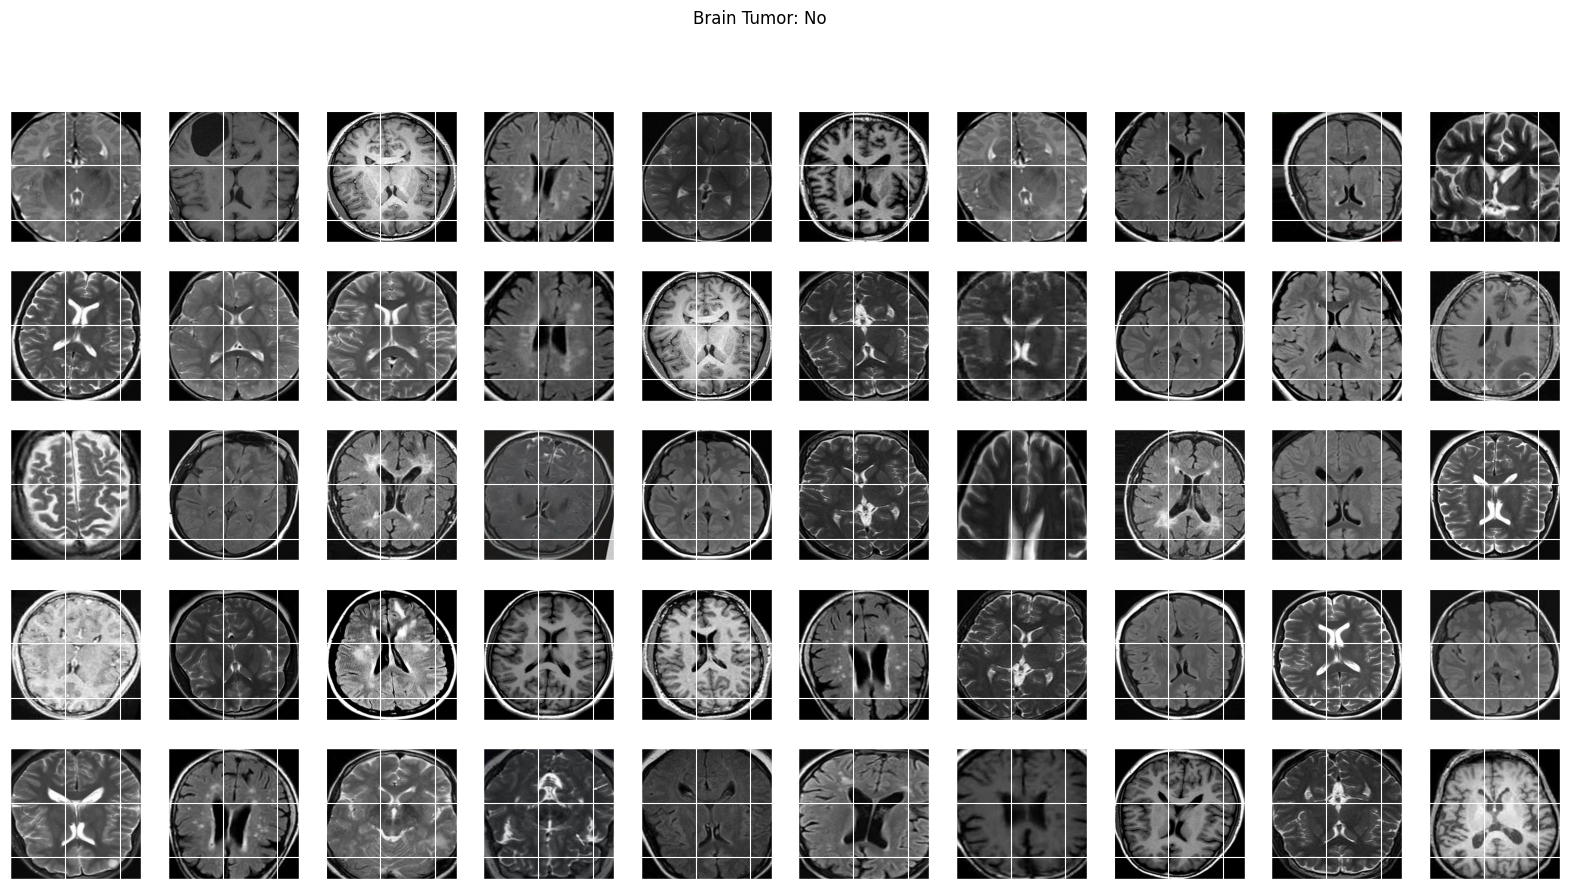

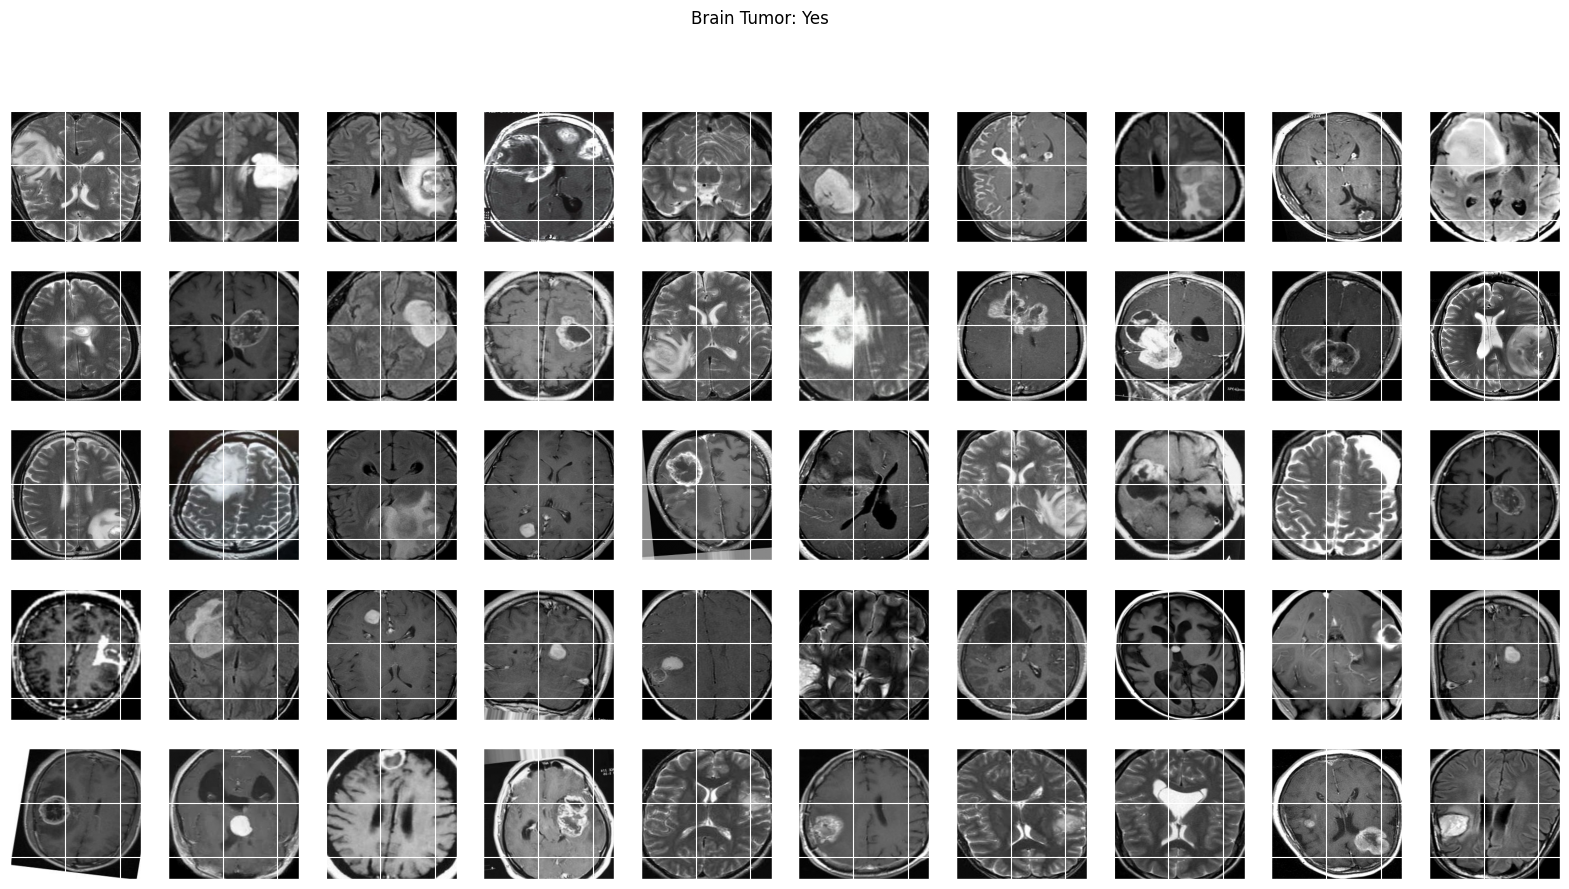

In [45]:
plot_sample_images(X,y)


In [46]:
if not os.path.isdir('tumorous_and_nontumorous'):
    base_dir = 'tumorous_and_nontumorous'
    os.mkdir(base_dir)

In [47]:
if not os.path.isdir('tumorous_and_nontumorous/train'):
    train_dir = os.path.join(base_dir , 'train')
    os.mkdir(train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test'):
    test_dir = os.path.join(base_dir , 'test')
    os.mkdir(test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid'):
    valid_dir = os.path.join(base_dir , 'valid')
    os.mkdir(valid_dir)

In [48]:
if not os.path.isdir('tumorous_and_nontumorous/train/tumorous'):
    infected_train_dir = os.path.join(train_dir, 'tumorous')
    os.mkdir(infected_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/tumorous'):
    infected_test_dir = os.path.join(test_dir, 'tumorous')
    os.mkdir(infected_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/tumorous'):
    infected_valid_dir = os.path.join(valid_dir, 'tumorous')
    os.mkdir(infected_valid_dir)

In [49]:
if not os.path.isdir('tumorous_and_nontumorous/train/nontumorous'):
    healthy_train_dir = os.path.join(train_dir, 'nontumorous')
    os.mkdir(healthy_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/nontumorous'):
    healthy_test_dir = os.path.join(test_dir, 'nontumorous')
    os.mkdir(healthy_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/nontumorous'):
    healthy_valid_dir = os.path.join(valid_dir, 'nontumorous')
    os.mkdir(healthy_valid_dir)

In [50]:
original_dataset_tumorours = os.path.join('augmented_data','yes/')
original_dataset_nontumorours = os.path.join('augmented_data','no/')

In [55]:
import os
import random
import shutil

# Define your directories
original_dataset_tumorours = 'augmented_data/yes/'  # Source directory
train_dir = infected_train_dir  # Directory for training images
validation_dir = infected_valid_dir  # Directory for validation images
test_dir = infected_test_dir  # Directory for test images

# Get all the files from the source directory
files = os.listdir(original_dataset_tumorours)

# Shuffle the files to randomize the selection
random.shuffle(files)

# Define split sizes
train_split = 0.7  # 70% for training
validation_split = 0.15  # 15% for validation
test_split = 0.15  # 15% for testing

# Compute the indices for each split
train_index = int(len(files) * train_split)
validation_index = int(len(files) * (train_split + validation_split))

# Split the dataset into train, validation, and test
train_files = files[:train_index]
validation_files = files[train_index:validation_index]
test_files = files[validation_index:]

# Function to copy files to the respective directories
def copy_files(file_list, source_dir, destination_dir):
    for fname in file_list:
        src = os.path.join(source_dir, fname)
        dst = os.path.join(destination_dir, fname)
        shutil.copyfile(src, dst)

# Copy the train files
copy_files(train_files, original_dataset_tumorours, train_dir)
print(f"Copied {len(train_files)} images to {train_dir} (Training set)")

# Copy the validation files
copy_files(validation_files, original_dataset_tumorours, validation_dir)
print(f"Copied {len(validation_files)} images to {validation_dir} (Validation set)")

# Copy the test files
copy_files(test_files, original_dataset_tumorours, test_dir)
print(f"Copied {len(test_files)} images to {test_dir} (Test set)")


Copied 1516 images to tumorous_and_nontumorous\train\tumorous (Training set)
Copied 325 images to tumorous_and_nontumorous\valid\tumorous (Validation set)
Copied 325 images to tumorous_and_nontumorous\test\tumorous (Test set)


In [56]:
import os
import random
import shutil

# Define your directories
original_dataset_nontumorours = 'augmented_data/no/'  # Source directory
train_dir = healthy_train_dir  # Directory for training images
validation_dir = healthy_valid_dir  # Directory for validation images
test_dir = healthy_test_dir  # Directory for test images

# Get all the files from the source directory
files = os.listdir(original_dataset_nontumorours)

# Shuffle the files to randomize the selection
random.shuffle(files)

# Define split sizes
train_split = 0.7  # 70% for training
validation_split = 0.15  # 15% for validation
test_split = 0.15  # 15% for testing

# Compute the indices for each split
train_index = int(len(files) * train_split)
validation_index = int(len(files) * (train_split + validation_split))

# Split the dataset into train, validation, and test
train_files = files[:train_index]
validation_files = files[train_index:validation_index]
test_files = files[validation_index:]

# Function to copy files to the respective directories
def copy_files(file_list, source_dir, destination_dir):
    for fname in file_list:
        src = os.path.join(source_dir, fname)
        dst = os.path.join(destination_dir, fname)
        shutil.copyfile(src, dst)

# Copy the train files
copy_files(train_files, original_dataset_nontumorours, train_dir)
print(f"Copied {len(train_files)} images to {train_dir} (Training set)")

# Copy the validation files
copy_files(validation_files, original_dataset_nontumorours, validation_dir)
print(f"Copied {len(validation_files)} images to {validation_dir} (Validation set)")

# Copy the test files
copy_files(test_files, original_dataset_nontumorours, test_dir)
print(f"Copied {len(test_files)} images to {test_dir} (Test set)")


Copied 1367 images to tumorous_and_nontumorous\train\nontumorous (Training set)
Copied 293 images to tumorous_and_nontumorous\valid\nontumorous (Validation set)
Copied 293 images to tumorous_and_nontumorous\test\nontumorous (Test set)


In [57]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  horizontal_flip=0.4,
                  vertical_flip=0.4,
                  rotation_range=40,
                  shear_range=0.2,
                  width_shift_range=0.4,
                  height_shift_range=0.4,
                  fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1.0/255)
valid_data_gen = ImageDataGenerator(rescale=1.0/255)

In [58]:
train_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/train/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')
test_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/test/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')
valid_generator = train_datagen.flow_from_directory('tumorous_and_nontumorous/valid/', batch_size=32, target_size=(240,240), class_mode='categorical',shuffle=True, seed = 42, color_mode = 'rgb')

Found 2883 images belonging to 2 classes.
Found 618 images belonging to 2 classes.
Found 618 images belonging to 2 classes.


In [59]:
class_labels = train_generator.class_indices
class_name = {value: key for (key,value) in class_labels.items()}
class_name

{0: 'nontumorous', 1: 'tumorous'}

## Importing a pre-trained model and training

In [60]:
base_model = VGG19(input_shape = (240,240,3), include_top=False, weights='imagenet')

for layer in base_model.layers:
    layer.trainable=False

x=base_model.output
flat = Flatten()(x)
class_1 = Dense(4608, activation = 'relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation = 'relu')(drop_out)
output = Dense(2, activation = 'softmax')(class_2)

model_01 = Model(base_model.input, output)
model_01.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 240, 240, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 240, 240, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 240, 240, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 120, 120, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 120, 120, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 120, 120, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 60, 60, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 60, 60, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 60, 60, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 30, 30, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 30, 30, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 30, 30, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4608)           │   115,610,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4608)           │             

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 120,921,986 (461.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [61]:
sgd = SGD(learning_rate=0.0001, decay = 1e-6, momentum = 0.9, nesterov = True)
model_01.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

c:\Users\tariq\Desktop\Unet\.venv\Lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [64]:
# callback
filepath = 'model.keras'
es = EarlyStopping(monitor='val_loss', verbose = 1, mode='min',patience=4)
cp = ModelCheckpoint(filepath, monitor='val_loss', verbose = 1, save_best_only=True, save_weights_only=False, mode='auto',save_freq='epoch')
lrr = ReduceLROnPlateau(monitor='val_accuarcy', patience=3, verbose = 1, factor = 0.5, min_lr = 0.0001)

In [65]:
history_01 = model_01.fit(train_generator, steps_per_epoch=10, epochs = 5, callbacks=[es,cp,lrr], validation_data=valid_generator)

c:\Users\tariq\Desktop\Unet\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.4741 - loss: 0.7294 
Epoch 1: val_loss improved from inf to 0.70302, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 396s 40s/step - accuracy: 0.4754 - loss: 0.7299 - val_accuracy: 0.5469 - val_loss: 0.7030 - learning_rate: 1.0000e-04
Epoch 2/5


c:\Users\tariq\Desktop\Unet\.venv\Lib\site-packages\keras\src\callbacks\callback_list.py:151: UserWarning: Learning rate reduction is conditioned on metric `val_accuarcy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.4856 - loss: 0.7334
Epoch 2: val_loss improved from 0.70302 to 0.67591, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 313s 32s/step - accuracy: 0.4861 - loss: 0.7329 - val_accuracy: 0.5874 - val_loss: 0.6759 - learning_rate: 1.0000e-04
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 56s/step - accuracy: 0.6327 - loss: 0.6760  
Epoch 3: val_loss did not improve from 0.67591
10/10 ━━━━━━━━━━━━━━━━━━━━ 700s 76s/step - accuracy: 0.6314 - loss: 0.6760 - val_accuracy: 0.5194 - val_loss: 0.7111 - learning_rate: 1.0000e-04
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15s/step - accuracy: 0.5551 - loss: 0.7176 
Epoch 4: val_loss improved from 0.67591 to 0.65155, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 395s 41s/step - accuracy: 0.5544 - loss: 0.7177 - val_accuracy: 0.6230 - val_loss: 0.6515 - learning_rate: 1.0000e-04
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.6140 - loss: 0.6634
Epoch 5: val_loss did not improve f

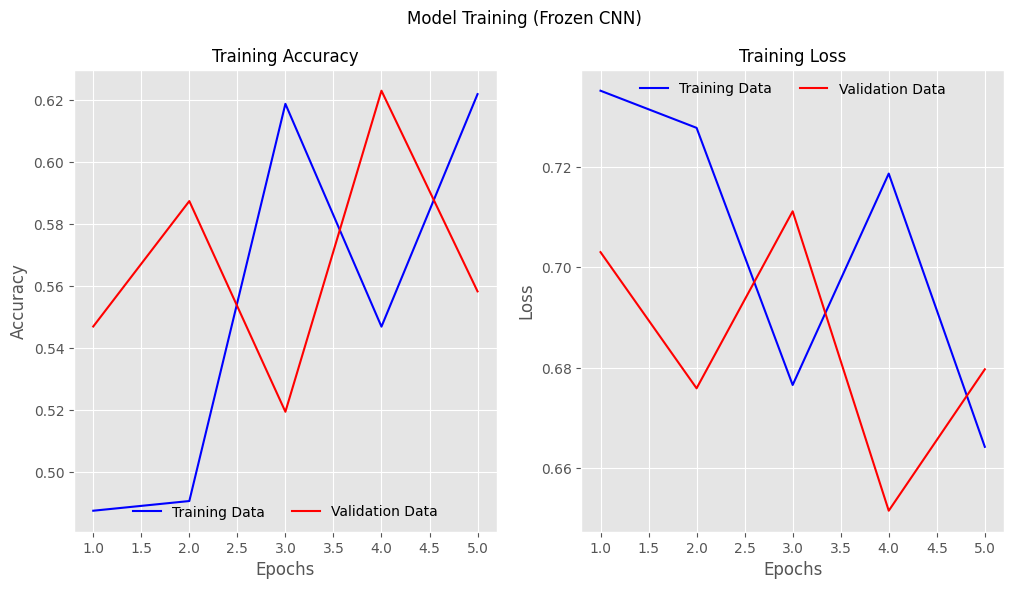

In [66]:
# Plot performance
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.suptitle("Model Training (Frozen CNN)", fontsize=12)
max_epoch = len(history_01.history['accuracy'])+1
epochs_list = list(range(1, max_epoch))

ax1.plot(epochs_list, history_01.history['accuracy'], color='b', linestyle='-', label='Training Data')
ax1.plot(epochs_list, history_01.history['val_accuracy'], color='r', linestyle='-', label='Validation Data')
ax1.set_title('Training Accuracy', fontsize=12)
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend(frameon=False, loc='lower center', ncol=2)

ax2.plot(epochs_list, history_01.history['loss'], color='b', linestyle='-', label='Training Data')
ax2.plot(epochs_list, history_01.history['val_loss'], color='r', linestyle='-', label='Validation Data')
ax2.set_title('Training Loss', fontsize=12)
ax2.set_xlabel('Epochs', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(frameon=False, loc='upper center', ncol=2)
plt.savefig("training_frozencnn.jpeg", format='jpeg', dpi=100, bbox_inches='tight')